## Loading PreTrained Models

In [15]:
import os
os.listdir('../data')
TEST_PATH = "../data/test.csv"
TRAIN_PATH = "../data/train.csv"
SAMPLE_SUBMISSION_PATH = "../data/sample_submission.csv"

In [16]:
import pandas as pd
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)
sample_submission_data = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [17]:
prediction_columns = [col for col in train_data.columns if col not in test_data]
input_columns = [col for col in test_data.columns]
print(prediction_columns)
print(input_columns)

['question_asker_intent_understanding', 'question_body_critical', 'question_conversational', 'question_expect_short_answer', 'question_fact_seeking', 'question_has_commonly_accepted_answer', 'question_interestingness_others', 'question_interestingness_self', 'question_multi_intent', 'question_not_really_a_question', 'question_opinion_seeking', 'question_type_choice', 'question_type_compare', 'question_type_consequence', 'question_type_definition', 'question_type_entity', 'question_type_instructions', 'question_type_procedure', 'question_type_reason_explanation', 'question_type_spelling', 'question_well_written', 'answer_helpful', 'answer_level_of_information', 'answer_plausible', 'answer_relevance', 'answer_satisfaction', 'answer_type_instructions', 'answer_type_procedure', 'answer_type_reason_explanation', 'answer_well_written']
['qa_id', 'question_title', 'question_body', 'question_user_name', 'question_user_page', 'answer', 'answer_user_name', 'answer_user_page', 'url', 'category', 

In [1]:
import torch

In [3]:
from transformers import BertTokenizer, BertModel
BERT_BASE_UNCASED_LOCATION = "../models/bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained(BERT_BASE_UNCASED_LOCATION, return_dict=True)

In [4]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [5]:
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

In [7]:
outputs = model(**inputs)

In [12]:
outputs.last_hidden_state.shape

torch.Size([1, 8, 768])

## Non-BERT features preprocessing

In [19]:
X, y = train_data[input_columns], train_data[prediction_columns]

In [21]:
from sklearn import preprocessing

In [38]:
host_category_encoder = preprocessing.OneHotEncoder(drop='first').fit(X[['host', 'category']])

In [39]:
host_category_encoding = host_category_encoder.transform(X[['host', 'category']]).toarray()

In [49]:
assert host_category_encoding.shape[1] == len(X['host'].unique()) + len(X['category'].unique()) - 2
assert host_category_encoding.shape[0] == len(X['host'])

In [62]:
X_non_BERT_features = pd.concat([pd.DataFrame(host_category_encoding), X['question_title'].map(len), X['question_body'].map(len), X['answer'].map(len)], axis=1)

In [63]:
X_non_BERT_features

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,question_title,question_body,answer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,68,836,833
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108,789,451
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56,653,1048
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,425,1337
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,44,416,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,393,1309
6075,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,581,1122
6076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50,693,134
6077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40,922,1429


## Non-BERT features linear regression

In [79]:
# train test split

assert X_non_BERT_features.shape[0] == y.shape[0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_non_BERT_features, y)

assert len(X_non_BERT_features) == len(X_train) + len(X_test)

In [100]:
# model

from sklearn.linear_model import LinearRegression

non_BERT_linear_regression = LinearRegression().fit(X_train, y_train)

y_pred = non_BERT_linear_regression.predict(X_test)
y_pred = pd.DataFrame(y_pred)

assert len(y_test) == len(y_pred)

In [127]:
# evaluation
import math
from scipy import stats

In [130]:
def evaluate(y_test, y_pred):
    assert y_test.shape == y_pred.shape
    correlations = [stats.spearmanr(y_test.iloc[:, col_index], y_pred.iloc[:, col_index]).correlation for col_index in range(y_test.shape[1])]
    score = sum([*filter(lambda x: not math.isnan(x), correlations)]) / len([*filter(lambda x: not math.isnan(x), correlations)])
    return score, correlations

In [149]:
score, correlations = evaluate(y_test, y_pred)
score

/Users/lessandro/Coding/KAGGLE/QUEST/venv/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


0.2614393768250053

worst predicted columns are: answer_relevance, question_not_really_a_question, answer_plausible
top predicted columns are:  question_type_instructions,  question_type_spelling,  answer_type_instructions


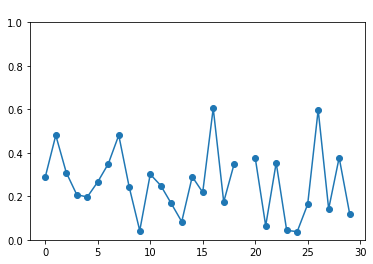

In [148]:
from matplotlib import pyplot as plt
def visualise_correlations(correlations):
    worst_columns = [prediction_columns[correlations.index(corr)] for corr in sorted(correlations)[:3]]
    top_columns = [prediction_columns[correlations.index(corr)] for corr in sorted(correlations)[-3:]]
    print("worst predicted columns are: " + ', '.join(worst_columns))
    print("top predicted columns are:  " + ',  '.join(top_columns))
    plt.plot(correlations, marker='o')
    plt.ylim(0, 1)
    plt.title("Correlation score for each column", c="w")
    plt.show()
    
visualise_correlations(correlations)